In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

1. Write a function to calculate and return the Minkowski distance with optional argument p defaulting to ‘p=2’ (Euclidean) of two vectors where a vector represents a data point

In [3]:
def mink(D,X,p=2):
        s=0
        for i in range(0,len(D)):
            s = (abs(D[i]-X[i]))**p + s
        return s**(1/p)  

2. Write a function to calculate and return the accuracy of two vectors

In [4]:
#x is actual and y is predicted

def accuracy(x,y):
    tp = sum((np.array(y) == 1) & (np.array(x)== 1))
    fp = sum((np.array(y) == 1) & (np.array(x)== 0))
    return (tp+fp)/(len(x))  

3. Write three functions to compute: precision, recall and F1 score. [

In [5]:
#x is actual and y is predicted
    
def prec(x,y):
    tp = sum((np.array(y) == 1) & (np.array(x)== 1))
    fp = sum((np.array(y) == 1) & (np.array(x)== 0))
    return (tp)/(tp+fp)  
    
def rec(x,y):
    tp = sum((np.array(y) == 1) & (np.array(x)== 1))
    fn = sum((np.array(y) == 0) & (np.array(x)== 1))
    return (tp)/(tp+fn)      
    
def f1(x,y):
    tp = sum((np.array(y) == 1) & (np.array(x)== 1))
    fn = sum((np.array(y) == 0) & (np.array(x)== 1))
    fp = sum((np.array(y) == 1) & (np.array(x)== 0))
    return (tp)/(tp+0.5*(fn+fp))       


4. Write a function to compute the confusion matrix of two vectors

In [6]:
def confm(x,y):
    tp = sum((np.array(y) == 1) & (np.array(x)== 1))
    tn = sum((np.array(y) == 0) & (np.array(x)== 0))
    fp = sum((np.array(y) == 1) & (np.array(x)== 0))
    fn = sum((np.array(y) == 0) & (np.array(x)== 1))
    return np.matrix([[tn, fp], [fn, tp]]) 

5. Write a function to generate the Receiver Operating Characteristic (ROC) curve

In [7]:
#subfunction used in roc 
def rate(y,model,X,nsteps):
    model.fit(Xtr_std,Ttr)
    pt=model.predict_proba(X) # predicted probs
    f1s=[]
    rec1=[]
    acc1=[]
    prec1=[]
    fpr1=[]
    th=np.arange(0,1,1/nsteps)  #varying threshold
    for j in range(nsteps):     #iterating through threshold values
        pyt=[]
        for i in range(len(pt)): #iterating through differnt probs 
            if pt[i]>th[j]:
                py=1 
            else:
                py=0            
            pyt.append(py) 
        prec1.append(prec(y,pyt))
        f1s.append(f1(y,pyt))
        acc1.append(accuracy(y,pyt))
        rec1.append(rec(y,pyt))
        fpr1.append(confm(y,pyt).item((0, 1))/(confm(y,pyt).item((0, 1))+confm(y,pyt).item((0, 0))))
    return (fpr1,rec1,prec1,f1s,acc1)  #rate return tuple of fpr, recall, precision, f1 and accuracy

5. Write a function to generate the Receiver Operating Characteristic (ROC) curve. 

In [8]:
def ROC(y,model,X,nsteps):
    fpr1=rate(y,model,X,nsteps)[0]
    tpr1=rate(y,model,X,nsteps)[1]
    plt.plot(fpr1,tpr1)
    plt.show    
    th=np.arange(0,1,1/nsteps) # def threhold
    maxr=max(rate(y,model,X,nsteps)[3]) #finds max f1 score
    thi=np.where(rate(y,model,X,nsteps)[3]==maxr)[0][0] #finds index of max f1 score
    opth=th[thi]                                      # finds optimal threshold
    return opth

6. Write a function to compute area under curve (AUC) for the ROC curve.

In [9]:
def AUC(y,model,X,nsteps):
    fpr1=rate(y,model,X,nsteps)[0]
    tpr1=rate(y,model,X,nsteps)[1]
    area=np.array([None]*(nsteps-2))   #area defined as None array
    for j in range(nsteps-2):          
        area[j]=tpr1[j]*(fpr1[j]-fpr1[j+1]) # area calculated as y(x)*x1-x0 for succesive points
    return sum(area)                          # area array summed over 

7. Write a function to generate the precision-recall curve.

In [10]:
def PRC(y,model,X,nsteps):
    precision=rate(y,model,X,nsteps)[2]
    recall=rate(y,model,X,nsteps)[1]
    plt.plot(recall,precision)
    return plt.show

8. Implement a KNN_Classifier model class. It should have the following three methods. 

In [11]:
class KNN_Cl():
    def __init__(self, k=5, weights="uniform", p=2):
            self.k = k
            self.weights  = weights
            self.p  = p
                
    def fit(self, D, T):
        self.D=D
        self.T=T

            
    def predict(self,X):
        pt=self.predict_proba(X)
        py=np.array([None]*len(pt))    #prob array as None
        for i in range(len(pt)):
            if pt[i]>0.5:             #update probs
                py[i]=1 
            else:
                py[i]=0
        return py

        
    def predict_proba(self,X):
        D1=self.D
        T1=self.T
        n1=self.k
        p1=self.p
        w1=self.weights
        d=np.array([None]*len(D1))
        pr=np.array([None]*len(X))
        x=len(X)
        for i in range(x):  
            for j in range(len(D1)):
                d[j]=mink(D1[j],X[i],p1)   
            dt=np.column_stack((d, T1))
            dn=dt[np.argsort(dt[:, 0])]
            if w1=="uniform":
                tx=dn[:, 1][:n1]
                pr[i]=sum(tx)/n1
            elif w1=="distance":
                tx=(dn[:, 1][:n1])/(dn[:, 0][:n1] + 0.0001) 
                pr[i]=sum(tx)/sum(1/(dn[:, 0][:n1] + 0.0001))
        return pr
        
    def get_params(self):
        return {
            'k': self.k,
            'weights': self.weights,
            'p': self.p,
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
        

    

9. Write a function named “partition” to split your data into training and test sets. The function
should take 4 arguments:

In [12]:
def partition(X,T,s,shuffle=True):
    Ts=pd.Series(T,name="t")
    data=pd.concat([X, Ts], axis=1)
    train_d = data.sample(frac=s, random_state=25)
    test_d = data.drop(train_d.index)
    train_X = train_d.drop('t', axis=1)
    train_T  = train_d['t']
    test_X = test_d.drop('t', axis=1)
    test_T  = test_d['t']
    return (train_X,train_T,test_X,test_T)

10. Read in the winequality-white.csv file as a Pandas data frame.

In [13]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url,sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


11. The target will be the “quality” column which represents the rating of wine and ranges from
3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality
wine) and 1s (representing “good” quality wine). 

In [15]:
#features
f = df.drop('quality', axis=1)

#target
t = df['quality']
l=len(t)

#target vector
tv=np.empty(l, dtype=object) #intialising target vector
for i in range(l):
    if t[i]>5:          #quality greater than 5 then good or target is 1
        tv[i]=1
    else:
        tv[i] =0    

tv

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

12. Provide a table with univariate statistics of your data (mean, standard deviation, and quartiles, min, max, missing count, number of unique values).

In [16]:
f.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


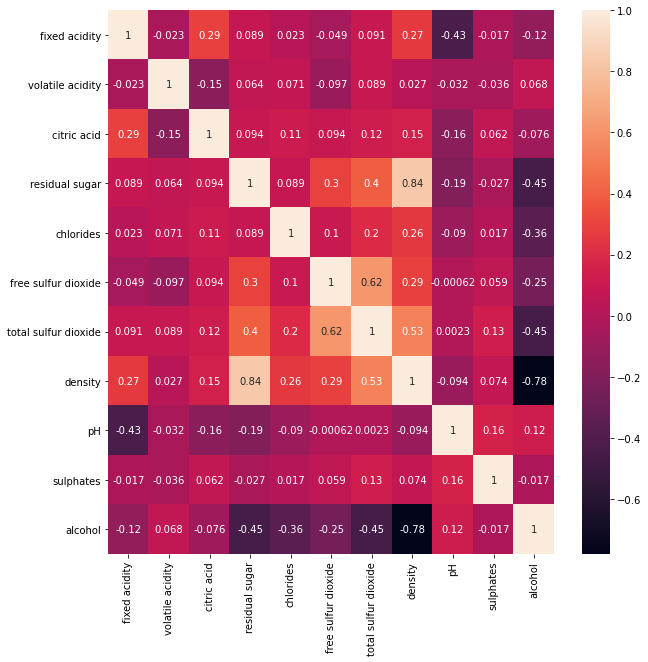

In [17]:
plt.figure(figsize=(10,10))
correlations = f[f.columns].corr(method='pearson')
sns.heatmap(correlations, annot = True)
plt.show()

13. Generate pair plots using the seaborn package to help identify redundant features. For any redundant features(?), report, drop, and explain your logic (w/ markdown). 

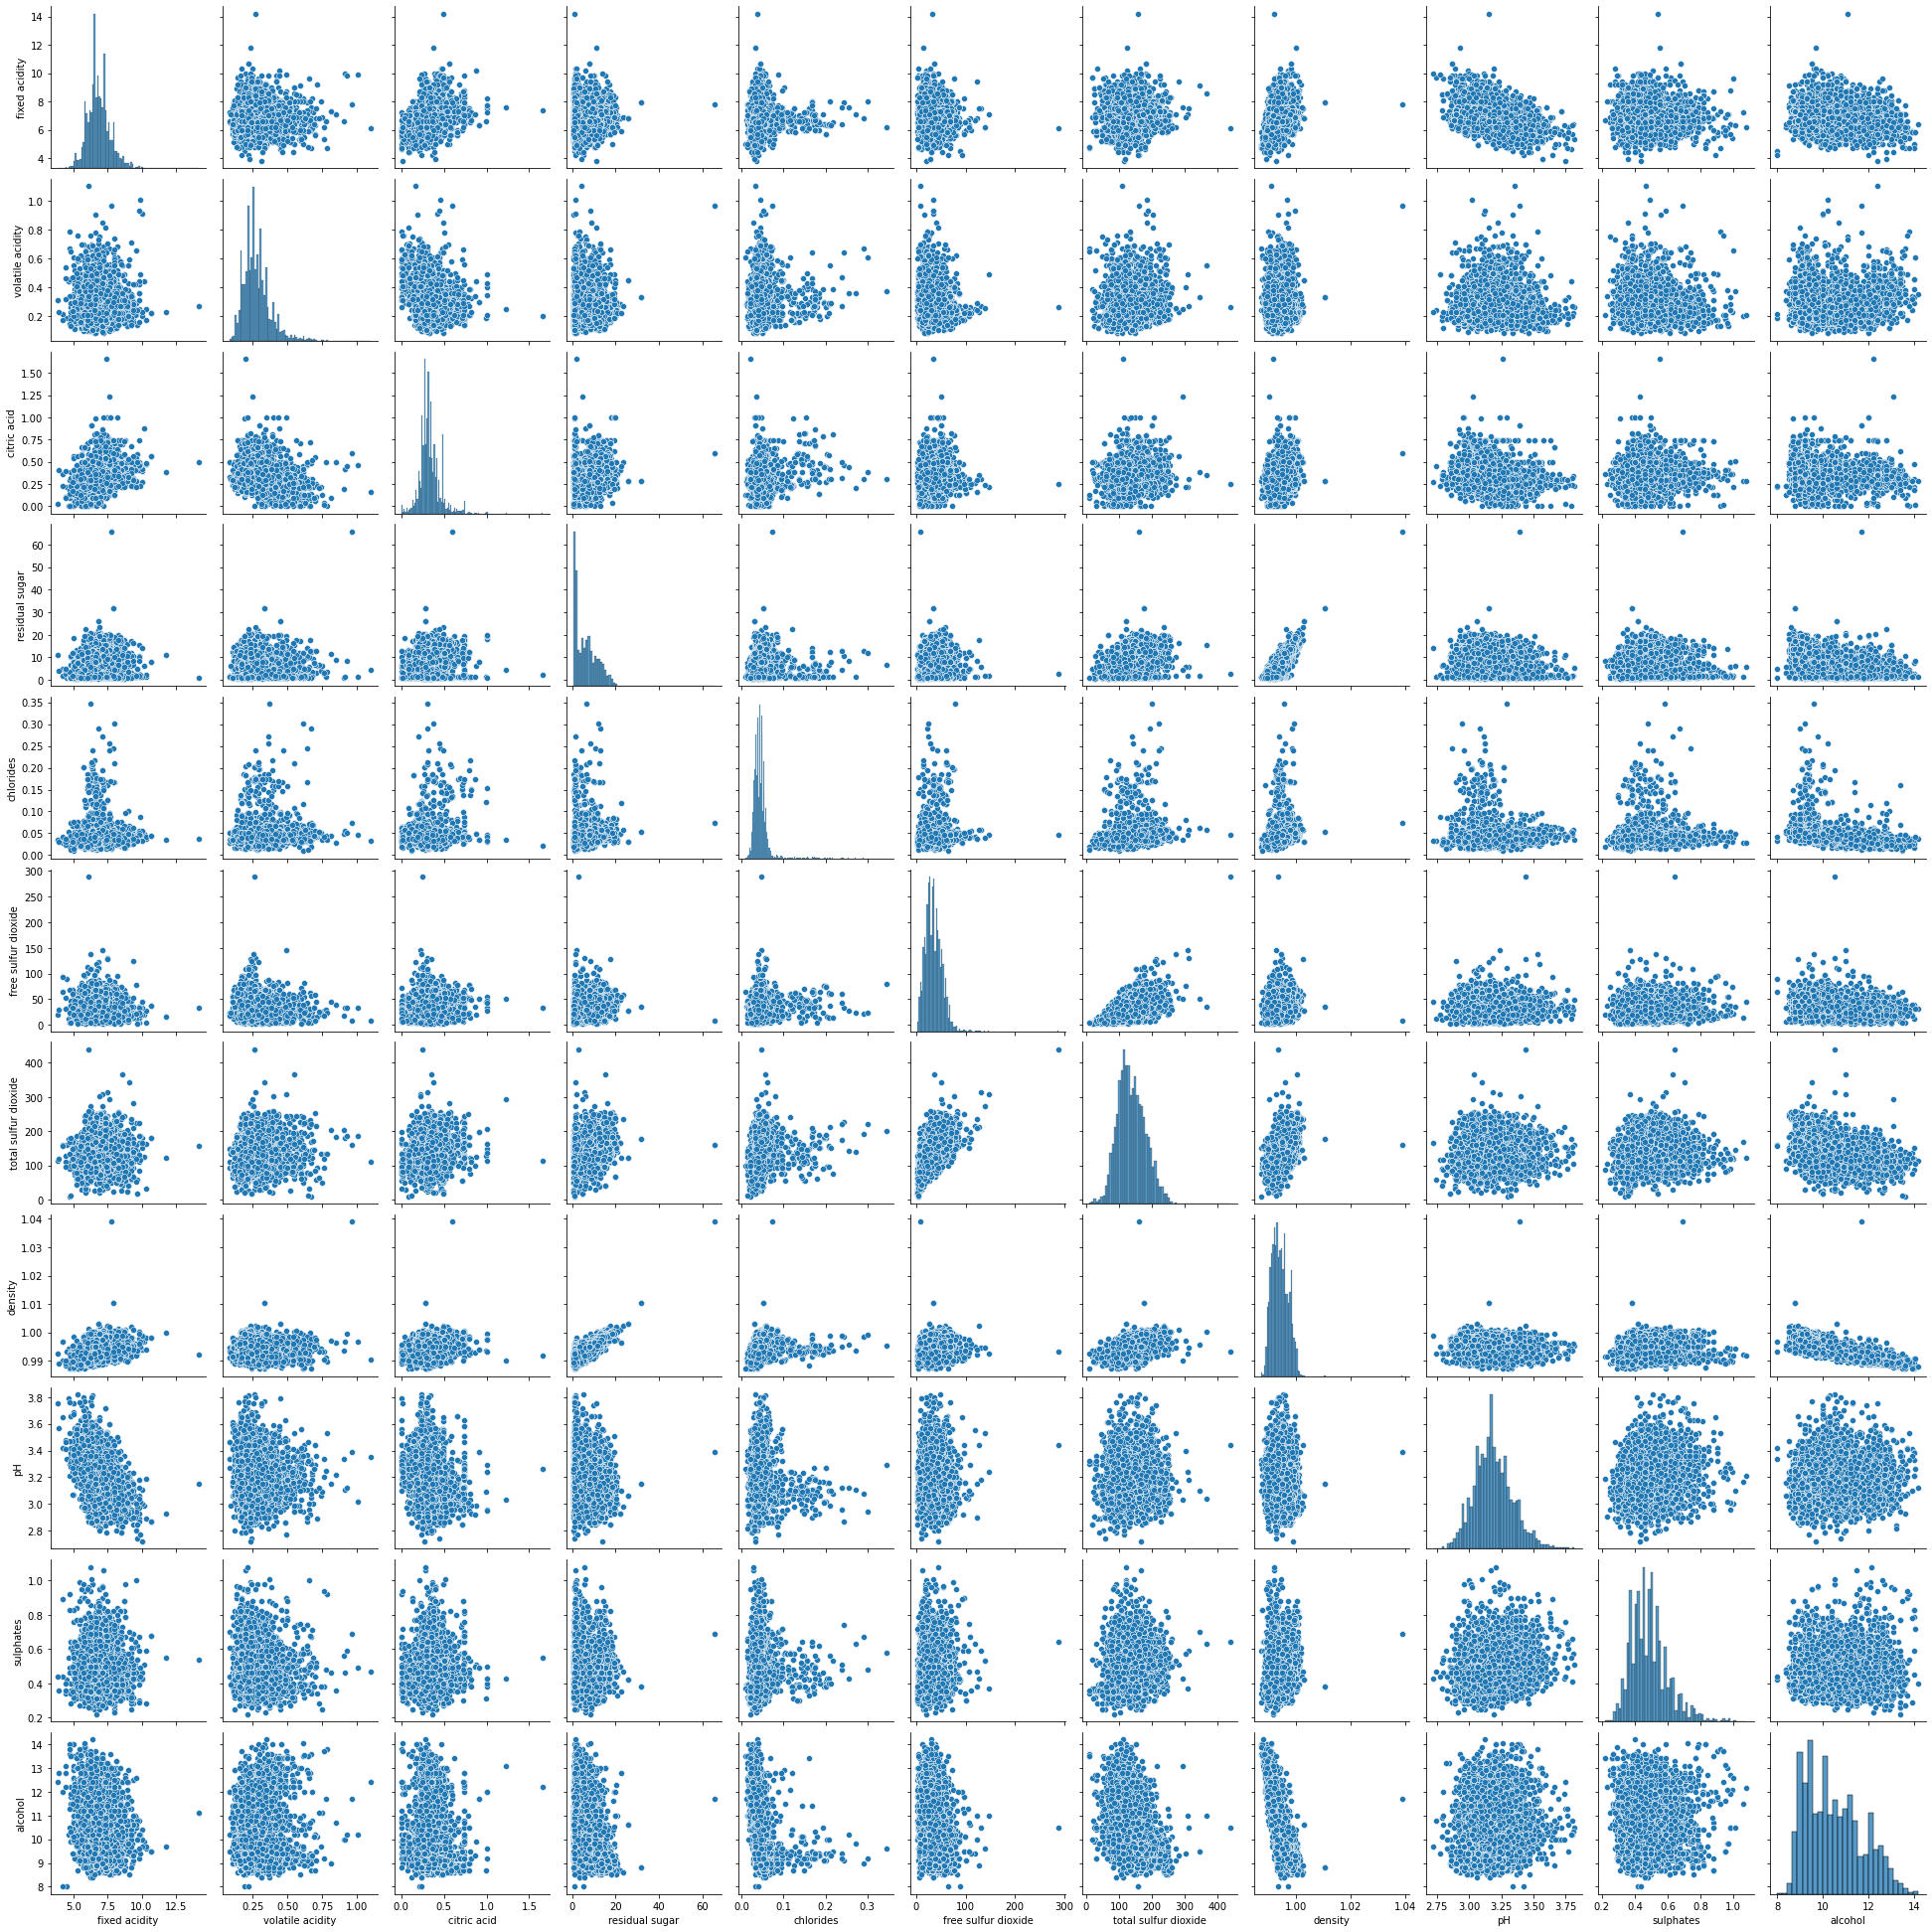

In [18]:
sns.pairplot(f)

Dropped features 'density','residual sugar' and 'free sulfur dioxide'. They have a linear relationship and are highly correlated

In [19]:
# reduced features after removing redundant ones. These features are highly correlated.
# A large correlation gives a high the variance of the weight vector or makes the model more sensitive to data  
rf = f.drop(['density','residual sugar','free sulfur dioxide'], axis=1) 

14. Use your “partition” function to split the data into 80% train and 20% test.

In [20]:
#partition the data
P=partition(rf,tv,0.8);

In [21]:
Xtr=P[0] #train_X
Ttr=P[1] #train_T
Xte=P[2] #test_X
Tte=P[3] #test_T

15. a. Use accuracy and F1 score to compare your predictions to the expected labels

In [22]:
m=KNN_Cl()
m.fit(Xtr.values,Ttr.values)
Xpr=m.predict(Xte.values)
print(accuracy(Tte,Xpr))
print(f1(Tte,Xpr))

0.7295918367346939
0.8151862464183381


15. b. Now standardize each feature of your training set (subtract mean and divide by standard deviation) and apply trained standardization to the test set. Use the mean and standard deviation values for each feature in the training set to scale the test data (you can use sklearn.preprocessing.StandardScaler)

In [23]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
Xtr_std = sc.fit_transform(Xtr)

# Apply the scaler to the test data
Xte_std = sc.fit_transform(Xte)

15.c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1
score with the expected labels

In [24]:
m.fit(Xtr_std,Ttr)
Tpr_std=m.predict(Xte_std)
print(accuracy(Tte,Tpr_std))
print(f1(Tte,Tpr_std))

0.7193877551020408
0.8398268398268398


15 d. Compare the two accuracy values and the F1 scores; and decide whether you should
use standardized data or unscaled data for the remainder of the assignment.

- For standardised data the f1 score is higher and accuracy is less. I use standardised data as f1 scores are higher 

15.e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it

In [26]:
mid=KNN_Cl(weights="distance")
mid.fit(Xtr_std,Ttr)
Tpr_std=mid.predict(Xte_std)
print(accuracy(Tte,Tpr_std))
print(f1(Tte,Tpr_std))

0.7204081632653061
0.8651766402307137


- For inverse distance both accuracy and f1 scores are higher so I use inverse distance

16. Repeat #15 a-d, but using a logistic regression with ‘elasticnet’ or ‘l2’ penalty

16.a. Use accuracy and F1 score to compare your predictions to the expected labels

In [27]:
lr = LogisticRegression(penalty='l2',solver='saga',max_iter=20000) #,l1_ratio=0.5

In [28]:
Ttr_lr=Ttr.astype('int')
Xtr_lr=Xtr.astype('int')
Xte_lr=Xte.astype('int')
lr.fit(Xtr_lr,Ttr_lr)
Tpr_lr=lr.predict(Xte_lr)
print(accuracy(Tte,Tpr_lr))
print(f1(Tte,Tpr_lr))

0.8306122448979592
0.8013377926421404


16. b. Now standardize each feature of your training set (subtract mean and divide by standard deviation) and apply trained standardization to the test set. Use the mean and standard deviation values for each feature in the training set to scale the test data (you can use sklearn.preprocessing.StandardScaler)

In [29]:
# Fit the scaler to the training data and transform
Xtr_std = sc.fit_transform(Xtr)

# Apply the scaler to the test data
Xte_std = sc.fit_transform(Xte)

16.c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1
score with the expected labels

In [30]:
Ttr_lr_std=Ttr.astype('int')
Xtr_lr_std=Xtr_std.astype('int')
Xte_lr_std=Xte_std.astype('int')
lr.fit(Xtr_lr_std,Ttr_lr)
Tpr_lr_std=lr.predict(Xte_lr_std)
print(accuracy(Tte,Tpr_lr_std))
print(f1(Tte,Tpr_lr_std))

0.8010204081632653
0.819918144611187


16 d. Compare the two accuracy values and the F1 scores; and decide whether you should
use standardized data or unscaled data for the remainder of the assignment.

- Again for standardised data the f1 score is higher and accuracy is less. I use standardised data as f1 scores are higher 

17) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross validation function. 

In [31]:
def sFold(folds, data, labels, model, error_fuction, **model_args):
    T=labels
    X=data
    model.set_params(**model_args)          #set corresponding model params
    kf = KFold(n_splits=folds, random_state=None, shuffle=False)   #define number of folds using KFold
    kf.get_n_splits(X)          #splits data into folds
    ef=error_fuction           #takes in corresponding error funciton
    ef_score = []
    T_predm1=[]
    T_test1=[]
    for train_index , test_index in kf.split(X):       # splits into train and test folds
        X_train , X_test = X[train_index,:],X[test_index,:]
        T_train , T_test = T.iloc[train_index],T.iloc[test_index]
        
        T_trainm=T_train.astype('int')
        
        model.fit(X_train,T_trainm)
        T_predm = model.predict(X_test)
     
        score_sf = ef(T_predm,T_test)    #calculates score for given error function
        ef_score.append(score_sf)        #appends error score through folds
        T_predm1.append(T_predm)
        T_test1.append(T_test.values)
        
    avg_err = sum(ef_score)/folds       #avg error across folds
    return (T_test1,T_predm1,avg_err)


18) Only using the training portion of your data, use your sfold function to evaluate the
performance of your model over each combination of k and distance metrics from the following
sets:

In [33]:
k=[1,5,9,11] #5,9,11
p=[2,1]  # p(distance metric) = [2=Euclidean, 1=Manhattan]
weights = ["uniform","distance"]

i=0
j=0

for comb in itertools.product(k, weights, p):  # makes combination of different metrics and iterates through them
    j=j+1


datf=[None]*j   
    
for comb in itertools.product(k, weights, p):
    model_args={'k': comb[0], 'p': comb[2], 'weights': comb[1]}   #sets model arg as corresponding combination in comb
    f1s=sFold(5, Xtr_std, Ttr, KNN_Cl(), f1, **model_args)[2]     #finds f1 scores of each folds
    datf[i]=[i,comb[0],comb[2],comb[1],f1s]                       # returns table of arguments and f1 score
    i=i+1
models=pd.DataFrame(datf,columns =['Experiment name','k', 'distance', 'weights', 'Average F1'])    
print(models)
      

    Experiment name   k  distance   weights  Average F1
0                 0   1         2   uniform    0.837312
1                 1   1         1   uniform    0.837461
2                 2   1         2  distance    0.837312
3                 3   1         1  distance    0.837461
4                 4   5         2   uniform    0.811302
5                 5   5         1   uniform    0.815458
6                 6   5         2  distance    0.847453
7                 7   5         1  distance    0.849952
8                 8   9         2   uniform    0.814582
9                 9   9         1   uniform    0.820917
10               10   9         2  distance    0.855101
11               11   9         1  distance    0.859422
12               12  11         2   uniform    0.821294
13               13  11         1   uniform    0.824675
14               14  11         2  distance    0.860057
15               15  11         1  distance    0.862374


19) Repeat #18 for at least 3 experiments for the regularized logistic regression from #16 and discuss why you optimized over you selected hyper-parameters

In [34]:
lr1 = LogisticRegression(penalty='l2',solver='saga',max_iter=200000,tol=0.00001) #,l1_ratio=0.5 penalty='l1',
sFold(5, Xtr_std, Ttr, lr1, f1)[2] #gives f1 score #lr is the model of Logistic Regression used before with elasticnet penalty

0.805031030295374

In [35]:
lr2 = LogisticRegression(penalty='l1',C=0.031,solver='saga',max_iter=200000,tol=0.00001) #,l1_ratio=0.5
sFold(5, Xtr_std, Ttr, lr2, f1)[2]

0.8128273405747244

In [36]:
lr3 = LogisticRegression(penalty='l2',C=0.01,solver='sag',max_iter=200000, tol=0.00001) #,l1_ratio=0.5
sFold(5, Xtr_std, Ttr, lr3, f1)[2]

0.8146191255601579

20) Based on the results above, use the full training portion (80%), to re-estimate your best
model. Discuss your model choice. 

In [37]:
#best Knn model parameters
best_args={'k': 11, 'p':1, 'weights': 'distance'}
bm=KNN_Cl() #best model
bm.set_params(**best_args)
bm.get_params()

{'k': 11, 'weights': 'distance', 'p': 1}

In [38]:
#best Knn model performance
bm.fit(Xtr.values,Ttr.values)
Xpr=bm.predict(Xte.values)
print(accuracy(Tte,Xpr))
print(f1(Tte,Xpr))

0.7459183673469387
0.8654390934844193


In [40]:
#best LR model performance
Ttr_lr_std=Ttr.astype('int')
Xtr_lr_std=Xtr_std.astype('int')
Xte_lr_std=Xte_std.astype('int')
lrb = LogisticRegression(penalty='l2',C=0.01,solver='sag',max_iter=200000, tol=0.00001)
lrb.fit(Xtr_lr_std,Ttr_lr_std)
Tpr_lr_std=lrb.predict(Xte_lr_std)
print(accuracy(Tte,Tpr_lr_std))
print(f1(Tte,Tpr_lr_std))

0.8346938775510204
0.819212808539026


21) Evaluate your best model on the test data and report the performance measures

In [41]:
bm.fit(Xtr.values,Ttr.values)
Xpr=bm.predict(Xte.values)
print("precision =", prec(Tte,Xpr))
print("recall =" ,rec(Tte,Xpr))
print("f1 =" ,f1(Tte,Xpr))
print("confusion matrix =", confm(Tte,Xpr))
print("accuracy =", accuracy(Tte,Xpr))
print("Generalisation error =",1-accuracy(Tte,Xpr))

precision = 0.8358413132694938
recall = 0.8972099853157122
f1 = 0.8654390934844193
confusion matrix = [[179 120]
 [ 70 611]]
accuracy = 0.7459183673469387
Generalisation error = 0.2540816326530613


22) Generate the ROC curve and determine the optimal threshold that maximizes the F1 score

0.5

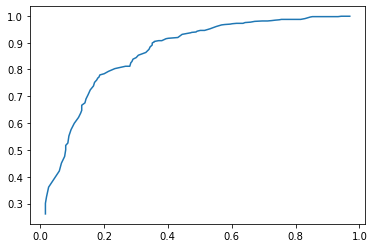

In [42]:
ROC(Tte,bm,Xte_std,100)

optimal threshold that maximizes f1 score is 0.5

23) Compute the AUC score

In [43]:
AUC(Tte,bm,Xte_std,100)

0.8330705877152919

24) Generate the precision-recall curve and determine the optimal threshold.

<function matplotlib.pyplot.show(close=None, block=None)>

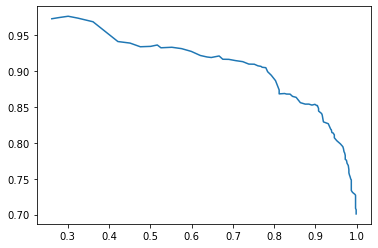

In [44]:
PRC(Tte,bm,Xte_std,100)

The optimal threshold is around the point for which recall is 0.8 since it is closest to the ideal model

25) Calculate and report the 95% confidence interval on the generalization error estimate.

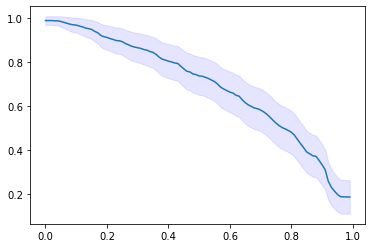

In [45]:
# x is the threshold and y is accuracy
nsteps=100
x = np.arange(0,1,1/nsteps)
y = np.array(rate(Tte,bm,Xte_std,nsteps)[4])

# 95% confidence interval
ci = 1.96 * np.sqrt((y * (1 - y)) / len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

26) Write a “Summary and Methods” section. No more than 2-5 sentences for each question below 

i. Provide a summary of the project and what you completed in the assignment.

- I defined the KNN model with performance measures like accuracy and ROC curve. 
Then I imported the data and analysed while dropping redundant features and the target vector was constructed
by binary classification of quality of wine. 
I defined the sfold funciton for data sampling and finding best parameters.  
Then we ran the KNN model and Logistic regression for different parameters using the sfold function and chose the best model. 
Finally we anlysed our best model performance on different metrics like accuracy and precision.

ii. Describe the dataset and features. What is the target? What are you calculating it from?

- The dataset contains different aspects of wine data like sulfur and alcohol content, ph, density.
Target is the good or bad quality of wine. It is calculated from the quality feature where greater than 5 is goood and bad 
otherwise.

iii. Describe the differences in fit and predict between the regularized logistic regression vs
KNN_Classifier. In particular, discuss training time vs prediction time for large data.
Also discuss the hyperparameters of each and why they are used.

- Logistic Regression is way quicker than KNN classifier for large data. 
LR takes few seconds to fit and predit data while KNN take just under a minute.  
The hyperparameters for KNN are k=11, weights = distance with Manhattan distance as this is the best model with highest f1 score.
The hyperparameters for LR are penalty='l2',C=0.01 (strength of regularization),solver='sag',max_iter=200000, tol=0.00001 
giving the highest f1 score.

27) Write a “Results” section. No more than 2-5 sentences for each question below

a) Describe the performance of the KNN model with respect to the different levels of k
and the different distance metrics. Include a table of performances, bolding the best.

- For same k and weights Manhattan distance metric performs better. More k gives better performance for any distance metric and weights.

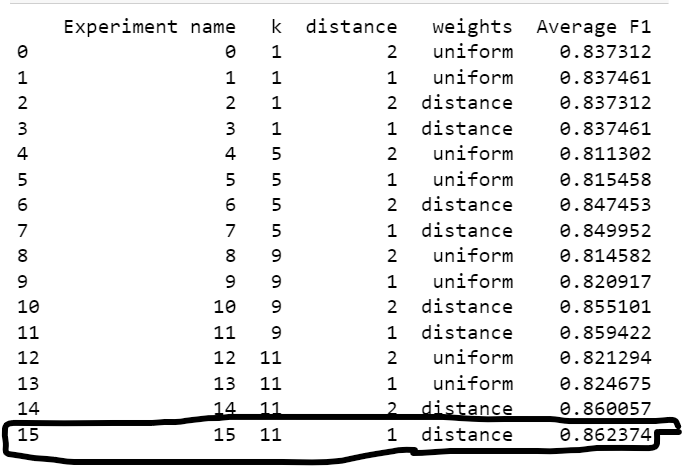

b) Characterize the overall performance of your model.

- My best model has a high AUC score of 0.833 which means it has a good measure of separability. Tt means there is a 83.3 % chance that the model will be able to distinguish between positive class and negative class.
The optimum threhold is 0.5 for highest f1 scores.


c) Discuss which quality values led to good performance of your model and those that
resulted in poor performance. Include a table of average error (e.g., F1 score) to support
your claims.

d) Give any final conclusions

- KNN model performs better than Logistic Regression